In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile as wav
from scipy.fftpack import fft
from math import pi, sin
import matplotlib.image as mpimg

In [38]:
rate_1, data_1 = wav.read('noise1.wav')
rate_2, data_2 = wav.read('noise2.wav')
rate_3, data_3 = wav.read('noise3.wav')

img = mpimg.imread('barbara.jpg')

In [15]:
t1 = len(data_1)/rate_1
t2 = len(data_2)/rate_2
t3 = len(data_3)/rate_3

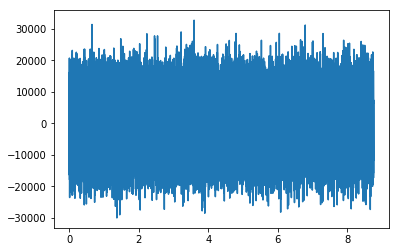

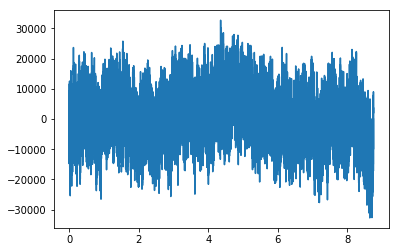

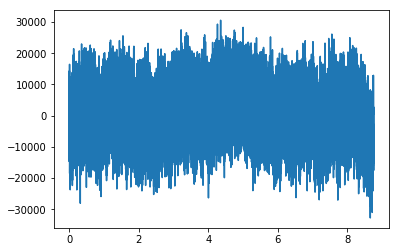

In [16]:
plt.plot(np.arange(0,t1,1/rate_1), data_1)
plt.show()
plt.plot(np.arange(0,t1,1/rate_2), data_2)
plt.show()
plt.plot(np.arange(0,t3,1/rate_3), data_3)
plt.show()


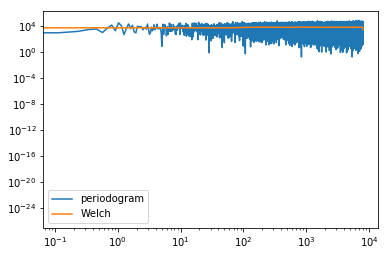

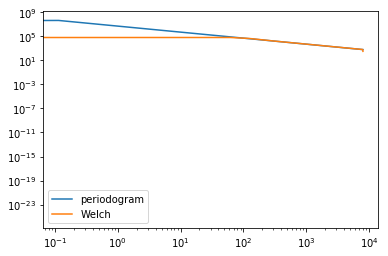

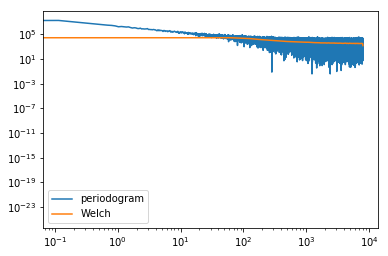

In [43]:
f_1, Pxx_den_1 = signal.periodogram(data_1, rate_1)
plt.plot(f_1, Pxx_den_1, label='periodogram')
f_1, Pxx_den_1 = signal.welch(data_1, rate_1)
plt.plot(f_1, Pxx_den_1, label='Welch')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

f_2, Pxx_den_2 = signal.periodogram(data_2, rate_2)
plt.plot(f_2, Pxx_den_2, label='periodogram')
f_2, Pxx_den_2 = signal.welch(data_2, rate_2)
plt.semilogy(f_2, Pxx_den_2, label='Welch')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

f_3, Pxx_den_3 = signal.periodogram(data_3, rate_3)
plt.plot(f_3, Pxx_den_3, label='periodogram')
f_3, Pxx_den_3 = signal.welch(data_3, rate_3)
plt.plot(f_3, Pxx_den_3, label='Welch')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

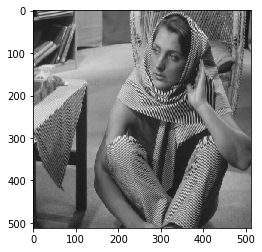

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


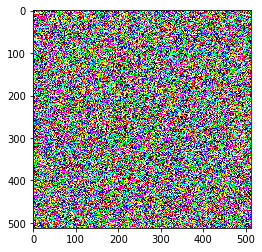

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


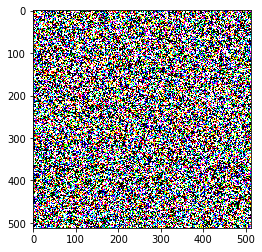

In [93]:
plt.imshow(img)
plt.show()
shape = img.shape

target_snr_db = 0
im_avg = np.sum(img)
im_avg_db = 10 * np.log10(im_avg)

noise_avg_db = im_avg_db - target_snr_db
noise_avg = 10**(noise_avg_db/10)

mean = 0
noise = np.random.normal(mean, noise_avg, shape)
noised_img = img + noise
noised_img = noised_img/255

plt.imshow(noised_img)
plt.show()

denoised_img = signal.wiener(noised_img)
plt.imshow(denoised_img)
plt.show()
